# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata)

# Display the data table for preview
merged_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [13]:
# Checking the number of mice.
unique_mice = merged_df['Mouse ID'].unique()
len(unique_mice)

249

In [32]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = merged_df[merged_df[['Mouse ID', 'Timepoint']].duplicated()]['Mouse ID'].unique()
duplicates


array(['g989'], dtype=object)

In [15]:
# Optional: Get all the data for the duplicate mouse ID.
merged_df.loc[merged_df['Mouse ID'] == 'g989']


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = merged_df.drop_duplicates(['Mouse ID', 'Timepoint'], keep='first')
# clean_df

clean_df = merged_df.drop(merged_df[merged_df['Mouse ID'] == 'g989'].index)
clean_df
# df = df.drop(df[df.score < 50].index)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [31]:
# Checking the number of mice in the clean DataFrame.
unique_mice = clean_df['Mouse ID'].unique()
len(unique_mice)

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
# drug_group_df = clean_df.groupby('Drug Regimen')

# mean_drug = np.mean(drug_group_df['Tumor Volume (mm3)'])

# median_drug = np.median(drug_group_df['Tumor Volume (mm3)'])

# variance_drug = np.var(drug_group_df['Tumor Volume (mm3)'])

# std_drug = np.std(drug_group_df['Tumor Volume (mm3)'])

# SEM_drug = sem(drug_group_df['Tumor Volume (mm3)'])

# Group by 'Drug Regimen'
drug_group_df = clean_df.groupby('Drug Regimen')

# Calculate mean for each group
mean_drug = drug_group_df['Tumor Volume (mm3)'].mean()

# Calculate median for each group
median_drug = drug_group_df['Tumor Volume (mm3)'].median()

# Calculate variance for each group
variance_drug = drug_group_df['Tumor Volume (mm3)'].var()

# Calculate standard deviation for each group
std_drug = drug_group_df['Tumor Volume (mm3)'].std()

# Calculate SEM for each group
SEM_drug = drug_group_df['Tumor Volume (mm3)'].apply(lambda x: sem(x, nan_policy='omit'))

# Combine the results into a single summary DataFrame
summary_stats = pd.DataFrame({
    'Mean': mean_drug,
    'Median': median_drug,
    'Variance': variance_drug,
    'Standard Deviation': std_drug,
    'SEM': SEM_drug
})

# Display the summary DataFrame
summary_df = pd.DataFrame(summary_stats)
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# Define a custom function to calculate SEM
def calculate_sem(x):
    return sem(x, nan_policy='omit')

# Group by 'Drug Regimen' and calculate the desired statistics
summary_stats = drug_group_df['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', calculate_sem])

# Rename the columns for clarity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

summary_df = pd.DataFrame(summary_stats)
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

[Text(0, 0, 'Capomulin'),
 Text(1, 0, 'Ramicane'),
 Text(2, 0, 'Ketapril'),
 Text(3, 0, 'Naftisol'),
 Text(4, 0, 'Zoniferol'),
 Text(5, 0, 'Stelasyn'),
 Text(6, 0, 'Placebo'),
 Text(7, 0, 'Infubinol'),
 Text(8, 0, 'Ceftamin'),
 Text(9, 0, 'Propriva')]

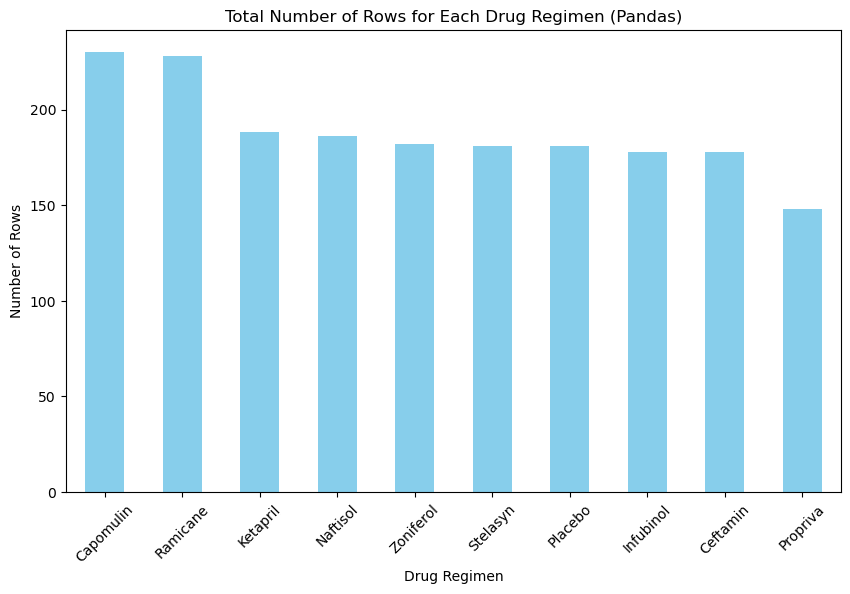

In [20]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by 'Drug Regimen' and count the number of rows for each group
drug_counts = clean_df['Drug Regimen'].value_counts()

# Create the first bar chart using Pandas DataFrame.plot() method
ax1 = drug_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
ax1.set_title('Total Number of Rows for Each Drug Regimen (Pandas)')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Number of Rows')
ax1.set_xticklabels(drug_counts.index, rotation=45)

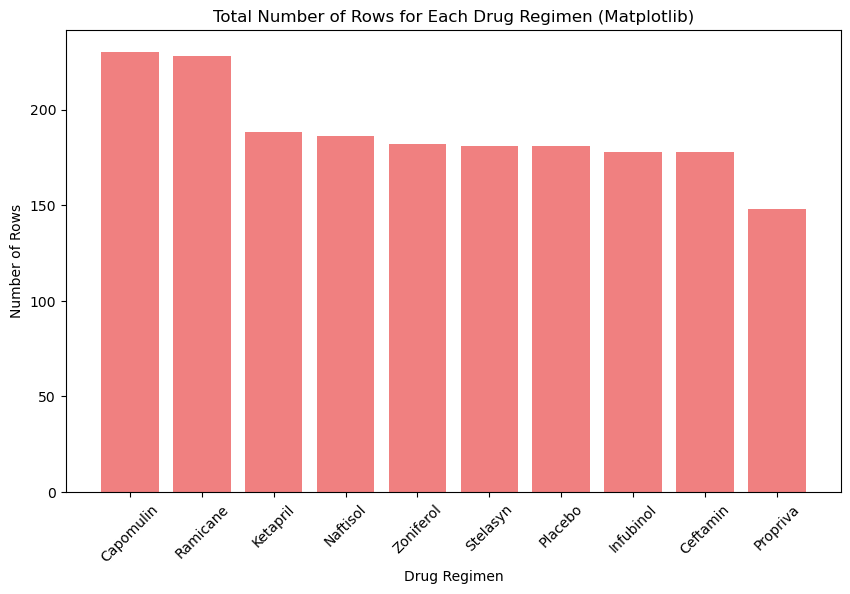

In [21]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Create the second bar chart using Matplotlib's pyplot methods
plt.figure(figsize=(10, 6))
plt.bar(drug_counts.index, drug_counts, color='lightcoral')
plt.title('Total Number of Rows for Each Drug Regimen (Matplotlib)')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)
plt.show()

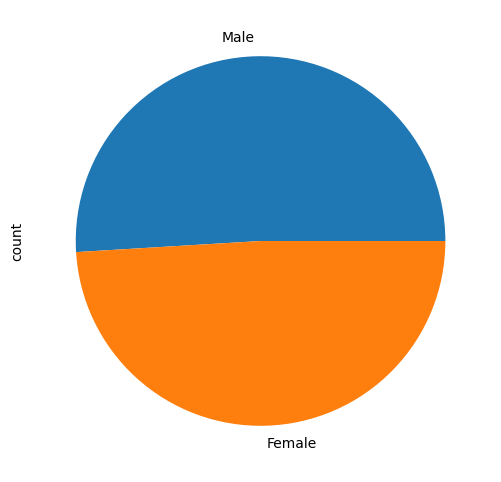

In [22]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_totals = clean_df['Sex'].value_counts()

# Make the pie chart
ax1 = gender_totals.plot(kind='pie', color='blue', figsize=(10, 6))

([<matplotlib.patches.Wedge at 0x21bdc7934c0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')],
 [Text(-0.01804473495415389, 0.5997285948997549, '51.0%'),
  Text(0.018044734954153686, -0.5997285948997549, '49.0%')])

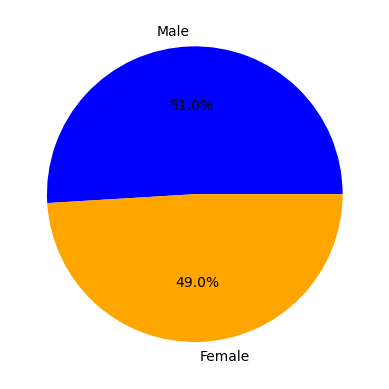

In [23]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.pie(gender_totals, labels=gender_totals.index, autopct='%1.1f%%', colors=['blue', 'orange'])

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_max_timepoint = clean_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
grouped_max_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_group_df = pd.merge(clean_df, grouped_max_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')
max_group_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
outliers_dict = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
quartiles = max_group_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5 * iqr)
upper_bound = upperq + (1.5 * iqr)

for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = max_group_df[max_group_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Determine outliers using upper and lower bounds
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    # Store the outliers in the dictionary
    outliers_dict[treatment] = outliers

    # add subset
    tumor_volume_data.append(treatment_data)

# Display the outliers for each treatment
for treatment, outliers in outliers_dict.items():
    print(f"{treatment} outliers: {outliers}")    


# Filter the relevant treatments
filtered_treatments = [data for data in tumor_volume_data if not data.empty]



Capomulin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


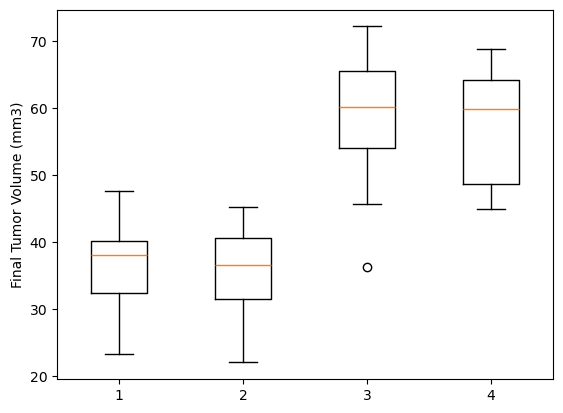

In [26]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_volume_data)
plt.show()

## Line and Scatter Plots

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


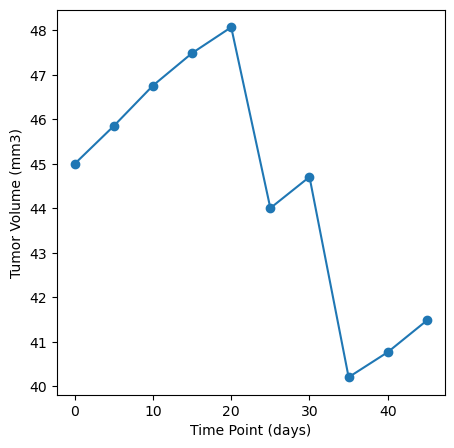

In [28]:

# Filter for Capomulin only
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Select a single mouse treated with Capomulin

single_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'l509']


plt.figure(figsize= (5, 5))

plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o')

# Add titles and labels

plt.xlabel('Time Point (days)')
plt.ylabel('Tumor Volume (mm3)')


# Show the plot
plt.show()



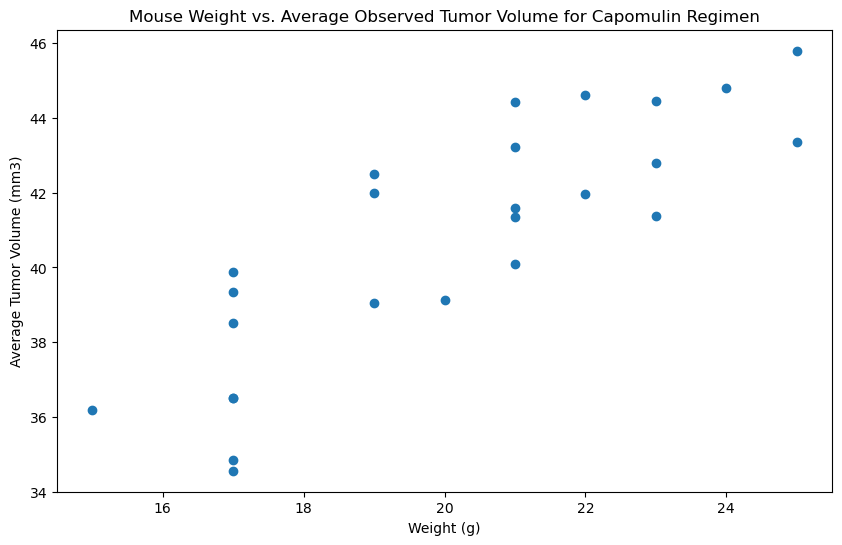

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group by Mouse ID and calculate the average tumor volume for each mouse
avg_tumor_volumes = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create a DataFrame with the average tumor volume and mouse weight
capomulin_avg_tumor_data = pd.DataFrame({
    'Weight (g)': mouse_weights,
    'Average Tumor Volume (mm3)': avg_tumor_volumes
})

# Generate a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_data['Weight (g)'], capomulin_avg_tumor_data['Average Tumor Volume (mm3)'])

# Add titles and labels
plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


# Show the plot
plt.show()

## Correlation and Regression

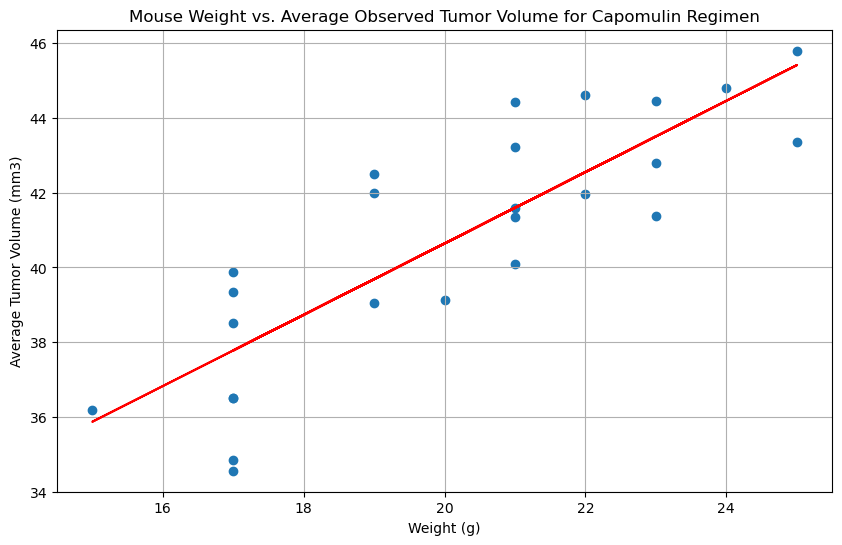

In [30]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
    # Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(
    capomulin_avg_tumor_data['Weight (g)'],
    capomulin_avg_tumor_data['Average Tumor Volume (mm3)']
)

# Generate a scatter plot with the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(capomulin_avg_tumor_data['Weight (g)'], capomulin_avg_tumor_data['Average Tumor Volume (mm3)'])
plt.plot(capomulin_avg_tumor_data['Weight (g)'], 
            slope * capomulin_avg_tumor_data['Weight (g)'] + intercept, 
            color='red')

# Add titles and labels
plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)

# Show the plot
plt.show()